# The spirit of Tutorial 3 is to:
## 1. recap representing points on a defined coordinate system,
## 2. Understanding displacement fields
## 3. visualize displacement fields in 2D and 3D,
## 4. interpreting the displacement in terms of a defined problem,
## 5. Symbolic Python computations
## Relevant functions in the module matplotlib: quiver
## Relevant functions in the module numpy: linspace, meshgrid

# Question 1 [10]
### Consider the following undeformed and deformed structure

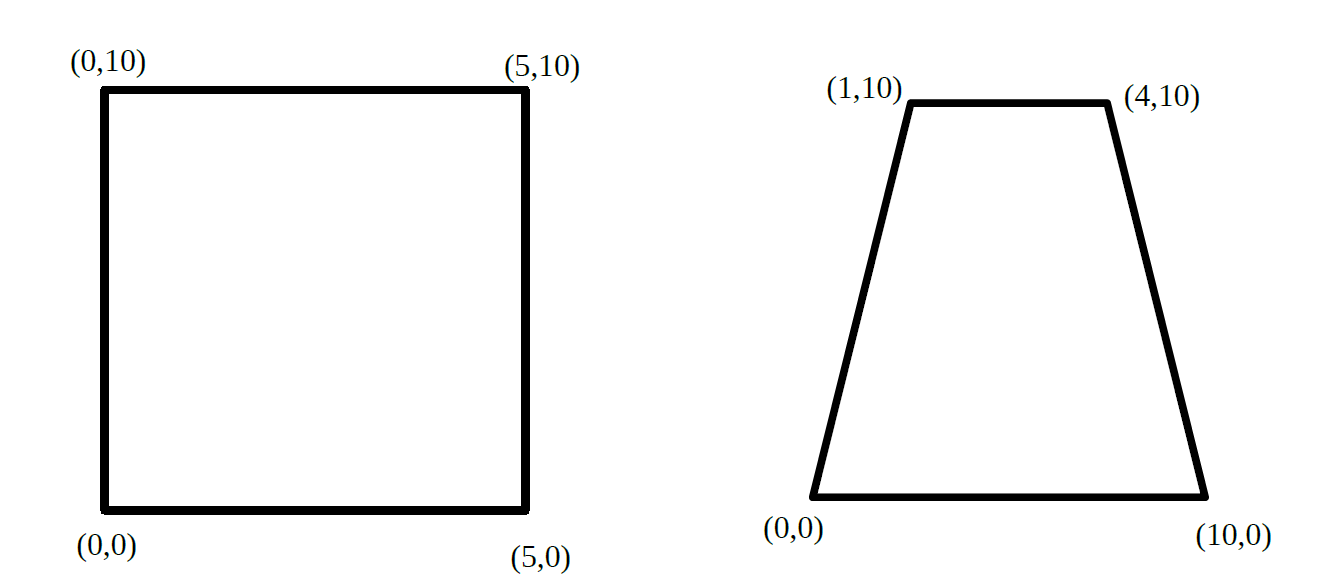

In [4]:
from IPython.display import Image
Image('tut3_q3_deformation.png',embed=True)

## 1.1. How many equations do you expect to require to enforce the nodal displacements of the square to the trapezoid? [2]

Answer here

One equation for each value that has changed - a minimum of 3 equations to solve for the 3 variables.

Maximum of 8 equations, an equation for each nodal variable in x and y, 4 nodes x 2 = 8 variables that requires 8 equations to solve

## To give an exact expressions for the displacement field (x-displacement field u(x,y) and y-displacement field v(x,y)). 
## 1.2. Give the number of terms you expect for each field, u(x,y) and  v(x,y)? [1]

Answer here

u(x,y) expect three terms for three nodal values that changed.

v(x,y) expect 0 terms as all nodal values for v are the same.

## 1.3. W.r.t. which variables do you expect the u(x,y) and v(x,y) fields to vary? [2] 

Answer here

u(x,y) expect three terms - linear x and y and maybe bi-linear xy (linear in x and y). As we move in y the u varies, similarly for x.

v(x,y) expect 0 terms as not v displacement is happening - all displacement is in x i.e. u field.

## 1.4. What form do you expect (constant, linear, quadratic, cubic, quartic) for the variations w.r.t. identified variables above for u(x,y) and v(x,y)? [1]

Answer here

u - linear x and y and maybe bi-linear xy (linear in x and y) - constant would be zero due to (0,0) u = 0

v - nothing

## 1.5. Give expressions for the displacement field (x-displacement field u(x,y) and y-displacement field v(x,y)) for the indicated deformation: [4]
## You may assume the form: $u(x,y) = ax + by + cxy + d$ and $v(x,y) = ex + fy + gxy + h$
### Example of solving a linear system of equations

In [49]:
print('Answer here')
a,b,c,d,x,y,rhs = sp.symbols('a,b,c,d,x,y,rhs')

u = a*x+b*y+c*x*y+d - rhs
Eq1 = u.subs({x:0,y:0,rhs:0})
Eq2 = u.subs({x:5,y:0,rhs:5})
Eq3 = u.subs({x:5,y:10,rhs:-1})
Eq4 = u.subs({x:0,y:10,rhs:1})

print(sp.linsolve([Eq1,Eq2,Eq3,Eq4],[a,b,c,d]))
print('u = {}'.format(u.subs({a:1/2,b:1/10,c:-9/100,d:0,rhs:0})))
print('Double check to confirm')

print('We know v is zero from inspection but I include for completeness')
e,f,g,h,x,y,rhs = sp.symbols('e,f,g,h,x,y,rhs')
v = e*x+f*y+g*x*y+h - rhs
Eq1 = v.subs({x:0,y:0,rhs:0})
Eq2 = v.subs({x:5,y:0,rhs:0})
Eq3 = v.subs({x:5,y:10,rhs:0})
Eq4 = v.subs({x:0,y:10,rhs:0})

print(sp.linsolve([Eq1,Eq2,Eq3,Eq4],[e,f,g,h]))
print('v = {}'.format(v.subs({e:0,f:0,g:0,h:0,rhs:0})))
print('Double check to confirm')

Answer here
{(1, 1/10, -7/50, 0)}
u = -0.09*x*y + 0.5*x + 0.1*y
Double check to confirm
We know v is zero from inspection but I include for completeness
{(0, 0, 0, 0)}
v = 0
Double check to confirm


In [40]:
u.subs({a:1/2,b:1/10,c:-9/100,d:0,rhs:0}).subs({x:0,y:10})

1.00000000000000

# Question 2 [6]
### Consider the following displacement field (x-displacement field u(x,y) and y-displacement field v(x,y)) of the structure in the xy-plane:
### $$
\begin{eqnarray*}
u(x,y) &=& \frac{px}{Ec^3}(c^3\cos(\theta) + (0.25\nu(2c^3 - 3c^2y + y^3) - 0.1y(3c^2 - 5y^2) + 0.25y(3L^2 - x^2))\sin(\theta))\\
v(x,y) &=& \frac{p}{(Ec^3)}(-c^3\nu y\cos(\theta) + (L^2(0.3125L^2 + c^2(0.375\nu + 0.6)) - 0.5c^3y + 0.375c^2y^2 - 0.025\nu y^2 (15 L^2 - 6c^2 - 15x^2 + 5y^2) + 0.0625x^4 - x^2(0.375L^2 + c^2(0.375\nu + 0.6)) - 0.0625y^4)\sin(\theta))
\end{eqnarray*}
$$

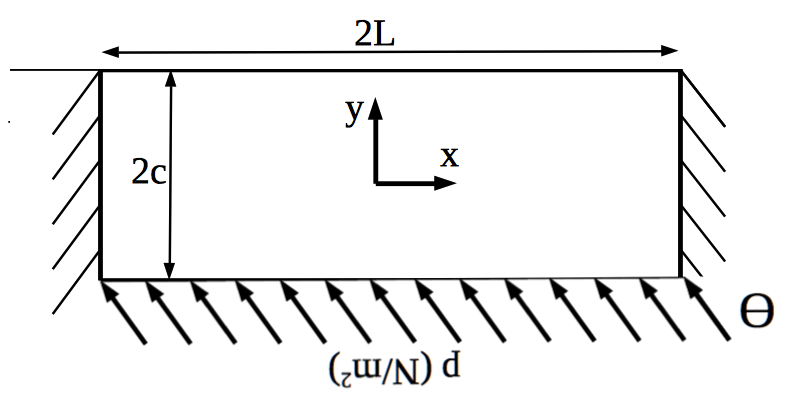

In [56]:
from IPython.display import Image
Image('q2_figure.png',embed=True)

## 2.1. As indicated the left and right edges are completely clamped. Does the given displacement field satisfy the prescribed displacement boundary conditions [2]. 
### Example of the usage of the symbolic Python simplify function. If you have a symbolic expression, press . and simplify() and Shift+Enter. This will simplify the expression.

In [51]:
import sympy as sp
import numpy as np

x,y,E,nu,c,p,L,theta = sp.symbols('x,y,E,nu,c,p,L,theta')
I = 1/12*1*(2*c)**3

u = p*sp.sin(theta)/(2*E*I)*((L**2*x-x**3/3)*y 
                        + x*(2*y**3/3 - 2*c**2*y/5) 
                        + nu*x*(y**3/3 - c**2*y + 2*c**3/3)) + p*sp.cos(theta)/E*x; 

v = -p*sp.sin(theta)/(2*E*I)*(y**4/12 - c**2*y**2/2 + 2*c**3*y/3 
                         + nu*((L**2 - x**2)*y**2/2 + y**4/6 - c**2*y**2/5) 
                         -x**4/12 
                         +x**2*(L**2/2 + c**2*(4/5 + nu/2)))+5*p*sp.sin(theta)*L**4/(24*E*I)*(1 + 12*c**2/(5*L**2)*(4/5+nu/2))-nu*p*sp.cos(theta)/E*y; 
print('Given displacement field u(x,y)')
print('-----------------------------')
print('u:');print(u.simplify())

print('Given displacement field v(x,y)')
print('-----------------------------')
print('v:');print(v.simplify())

print('-----------------------------')
print('Start of your answer')
print('-----------------------------')

print('No, left edge horizontal and vertical displacement should be 0 but it is not:')
print('u(-L,y): {}'.format(sp.simplify(u.subs({x:-L}))))
print('v(-L,y): {}'.format(sp.simplify(v.subs({x:-L}))))
print('\n')
print('No, right edge horizontal and vertical displacement should be 0 but it is not:')
print('u(L,y): {}'.format(sp.simplify(u.subs({x:L}))))
print('v(L,y): {}'.format(sp.simplify(v.subs({x:L}))))

Given displacement field u(x,y)
-----------------------------
u:
p*x*(c**3*cos(theta) + (0.25*nu*(2*c**3 - 3*c**2*y + y**3) + 0.25*y*(3*L**2 - x**2) - 0.1*y*(3*c**2 - 5*y**2))*sin(theta))/(E*c**3)
Given displacement field v(x,y)
-----------------------------
v:
p*(-c**3*nu*y*cos(theta) + (L**2*(0.3125*L**2 + c**2*(0.375*nu + 0.6)) - 0.5*c**3*y + 0.375*c**2*y**2 - 0.025*nu*y**2*(15*L**2 - 6*c**2 - 15*x**2 + 5*y**2) + 0.0625*x**4 - x**2*(0.375*L**2 + c**2*(0.375*nu + 0.6)) - 0.0625*y**4)*sin(theta))/(E*c**3)
-----------------------------
Start of your answer
-----------------------------
No, left edge horizontal and vertical displacement should be 0 but it is not:
u(-L,y): L*p*(-c**3*cos(theta) + (-0.5*L**2*y - 0.25*nu*(2*c**3 - 3*c**2*y + y**3) + 0.1*y*(3*c**2 - 5*y**2))*sin(theta))/(E*c**3)
v(-L,y): -1.0*p*y*(1.0*c**3*nu*cos(theta) + 0.5*c**3*sin(theta) - 0.15*c**2*nu*y*sin(theta) - 0.375*c**2*y*sin(theta) + 0.125*nu*y**3*sin(theta) + 0.0625*y**3*sin(theta))/(E*c**3)


No, right edge h

## 2.2 Assume values for E, $\nu$, I, c, L, p and $\theta$ and visualise the displacement field  [2]
### Example of using quiver to visualize vector field
### Use the opportunity to investigate the effect of the parameters E, $\nu$, I, c, L, p and $\theta$ on the problem.

4.76190476190476e-6*x
-2.38095238095238e-6*y


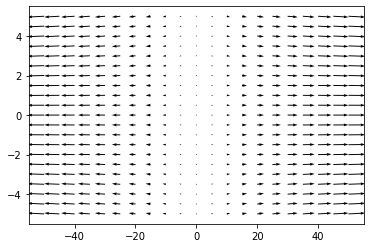

In [53]:
import numpy as np
import matplotlib.pyplot as plt

problem_setup = {E:210E5,I:5000,L:50,c:5,p:100,theta:0,nu:0.5}

up = u.subs(problem_setup); print(up)
vp = v.subs(problem_setup); print(vp)

upn = sp.lambdify([x,y],up,'numpy')
vpn = sp.lambdify([x,y],vp,'numpy')

xn = np.linspace(-50,50,21)
yn = np.linspace(-5,5,21)

X,Y = np.meshgrid(xn,yn)

U = upn(X,Y)
V = vpn(X,Y)

plt.quiver(X,Y,U,V)
plt.show()

## 2.3 Compute the strain tensor from the given displacement field and give the engineering shear strain $\gamma_{xy}$ i.e. $\gamma_{xy} = \frac{\partial u}{\partial y} + \frac{\partial v}{\partial x}$  [2]

In [8]:
U = [u,v]
gradU = sp.derive_by_array(U,[x,y])
strain = 0.5*(gradU + gradU.transpose())

print((strain[0,1] + strain[1,0]).simplify())
print((2*strain[1,0]).simplify())

1.5*p*x*(-c**2*nu - c**2 + nu*y**2 + y**2)*sin(theta)/(E*c**3)
1.5*p*x*(-c**2*nu - c**2 + nu*y**2 + y**2)*sin(theta)/(E*c**3)


# Question 3 [18]
# Consider the prismatic bar hanging under its own weight i.e. under gravity with a body force of $\rho g$ N/m$^3$. The bar has a height of $H$, width $2W$ and breadth of $2B$ as indicated, and is made of a material with Young's modulus E and Poisson's ratio $\nu$. The bar is fully clamped at the top. Consider the coordinate system as indicated with the following displacement field, which depends on (x,y,z):
# Displacement in the x-direction: $u(x,y,z) = -\frac{\nu\rho g xz }{E}$
# Displacement in the y-direction: $v(x,y,z) = -\frac{\nu\rho g yz }{E}$
# Displacement in the z-direction: $w(x,y,z) = \frac{\rho g z^2}{2E} + \frac{\nu \rho g (x^2 + y^2)}{2E} - \frac{\rho g H^2}{2E}$

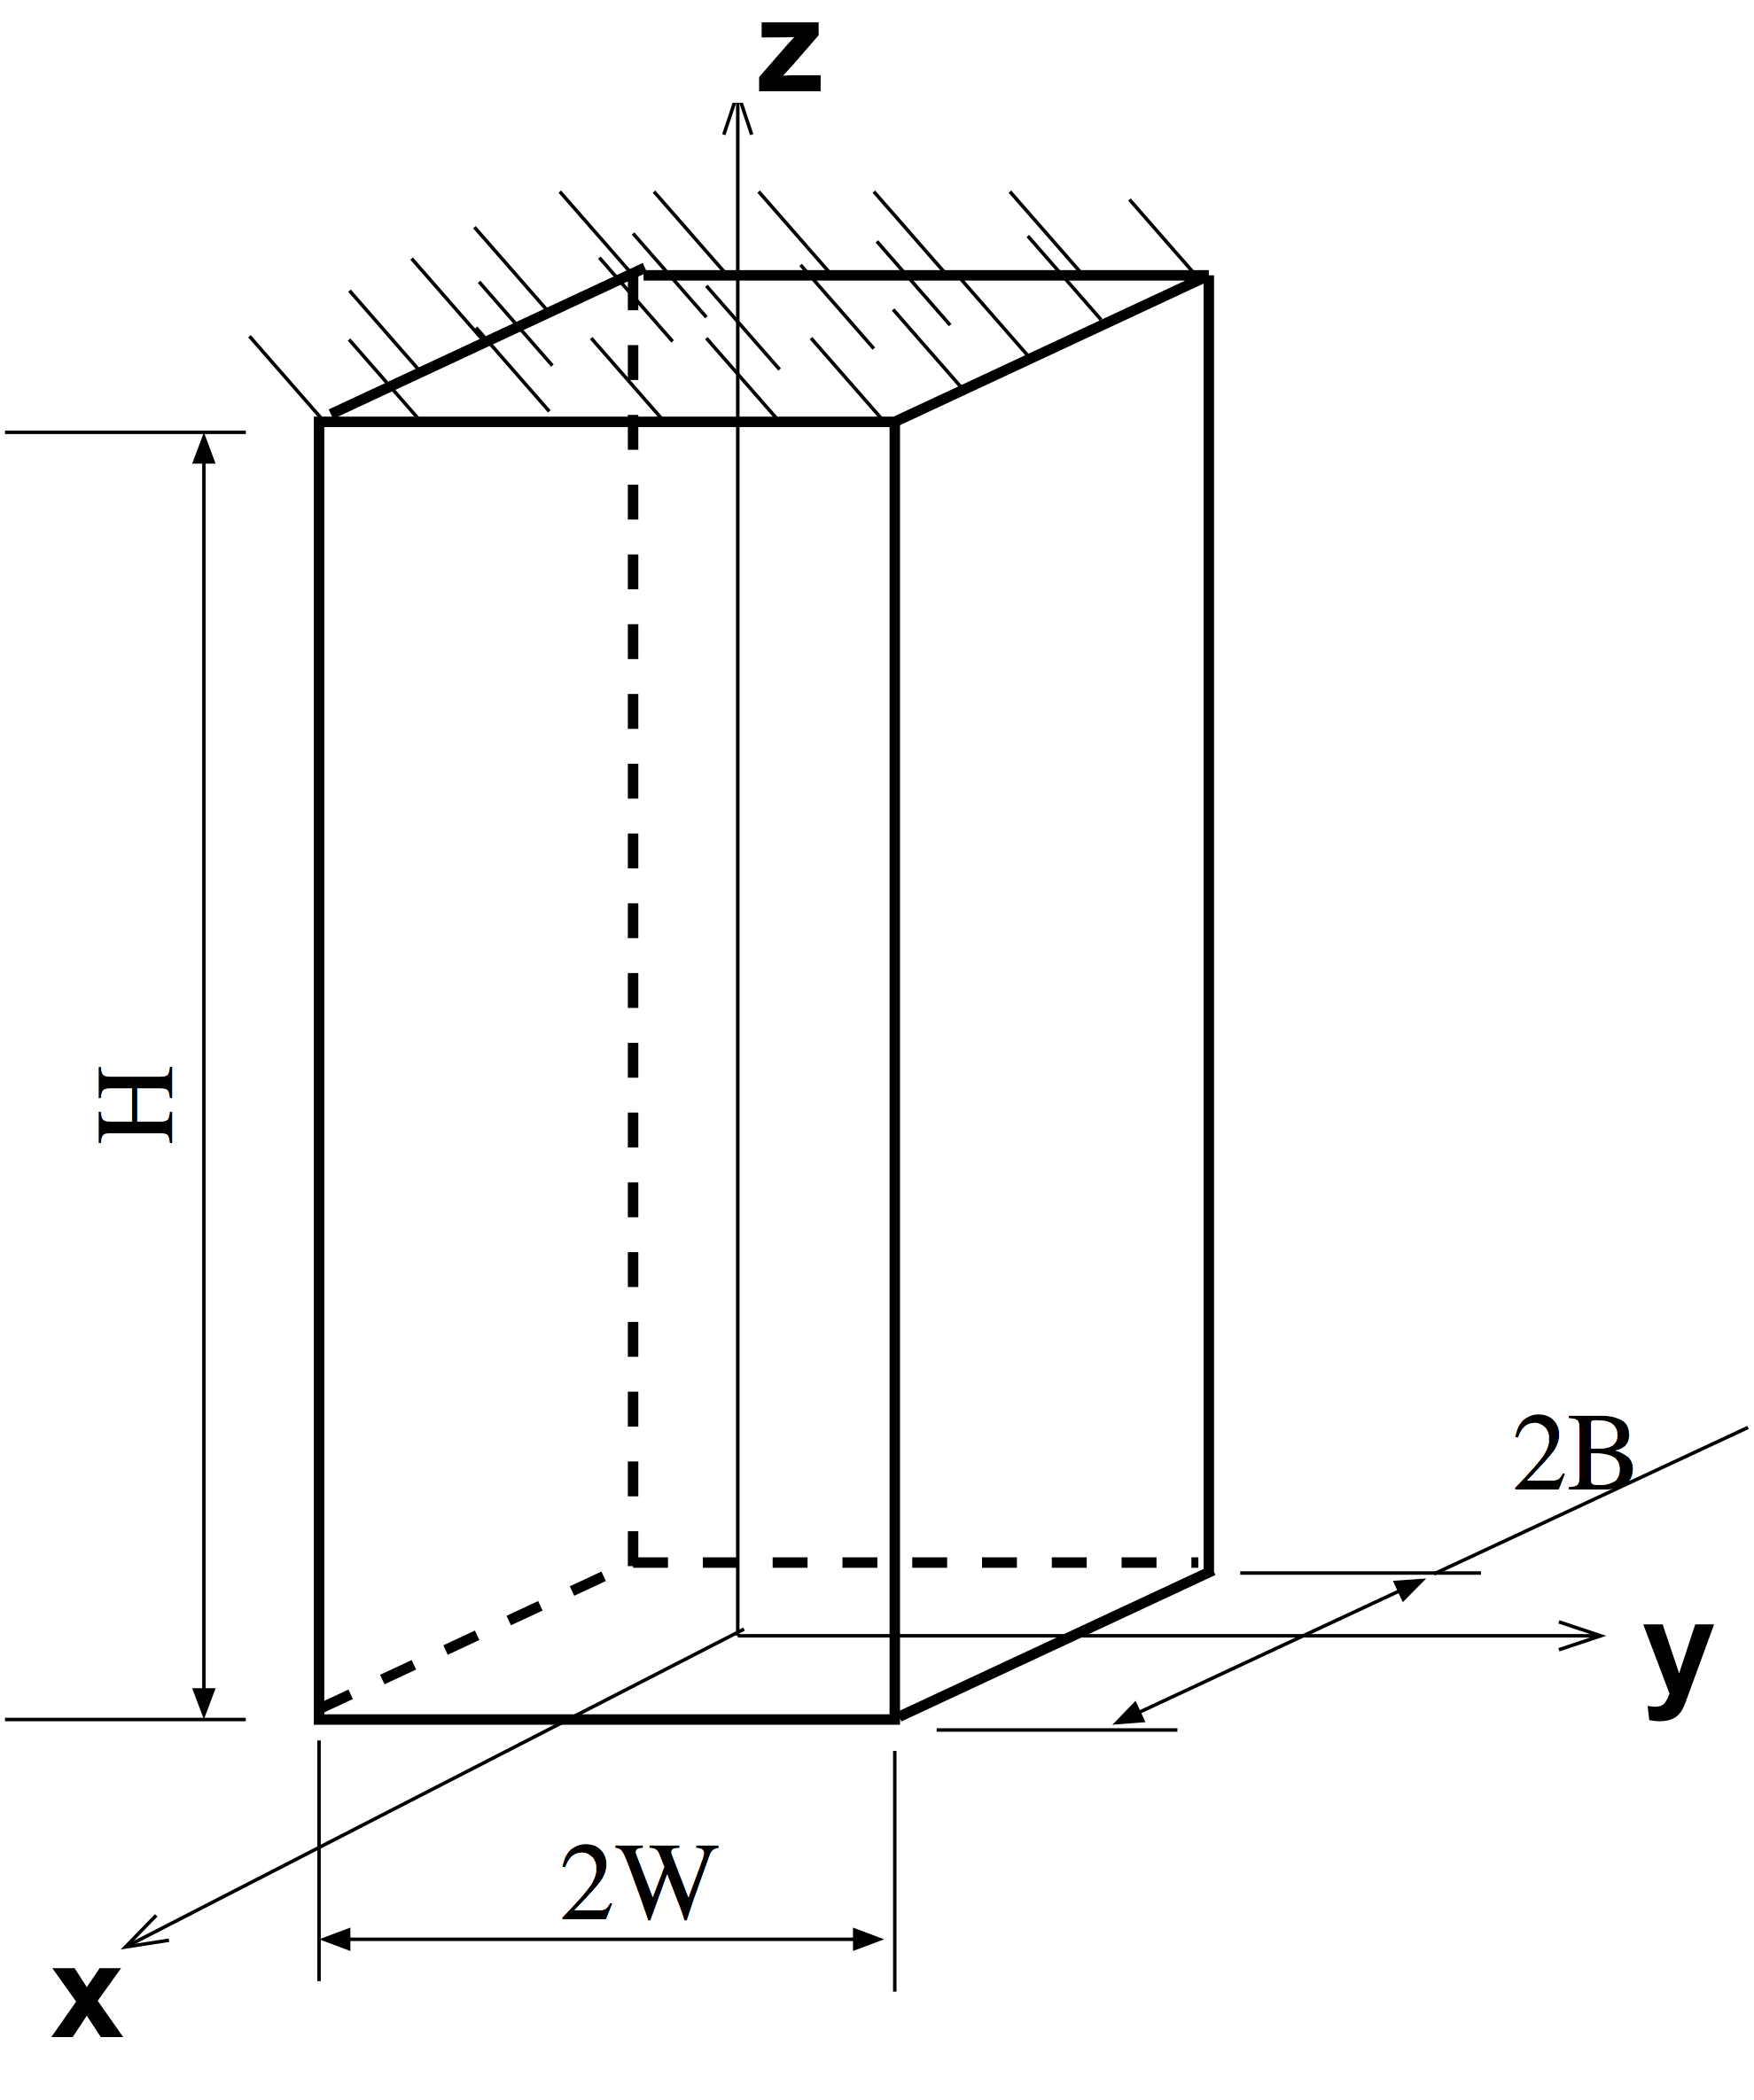

In [64]:
from IPython.display import Image
Image('figures/bar_own_weight.png',embed=True)

# Assume values of your choice for E, rho, nu, g, H, W and B. 

## 3.1. Compute the strain matrix (tensor) given the displacement field below: [4] 
### Example of sympy.derive_by_array
### Example of transpose operator
### Example of adding two matrices

In [9]:
import sympy
rho, g, nu, E, W, B, H, x, y, z = sympy.symbols('rho, g, nu, E, W, B, H, x, y, z')

u = -nu*rho*g*x*z/E
v = -nu*rho*g*y*z/E
w = rho*g*z**2/(2*E) + nu*rho*g*(x**2+y**2)/(2*E) - rho*g*H**2/(2*E)
#----------------------------------------------------

# We want to compute the partial derivatives of displacement vector (ux,uy,uz) w.r.t. spatial variables (x,y,z)
displacement_vector = [u,v,w] # Note I add the components to a LIST - only the square brackets []
spatial_coordinates = [x, y, z] # Note I add the spatial components to a LIST - only the square brackets []

# Components inside lists when using derive_by_array
displacement_gradient = sympy.derive_by_array(displacement_vector, spatial_coordinates) 
print('Object type returned {} - sympy tensor array object, which supports linear algebra operations'.format(type(displacement_gradient)))

# Strain is defined as 0.5*(grad(u)^T + grad(u))
strain_matrix = 0.5*(displacement_gradient.transpose() + displacement_gradient)
sympy.pprint(strain_matrix)
print('Strain matrix - interpret the result: normal strain in x and y are Poisson contraction,\n due to gravity body force acting in the z direction')

Object type returned <class 'sympy.tensor.array.dense_ndim_array.ImmutableDenseNDimArray'> - sympy tensor array object, which supports linear algebra operations
⎡-1.0⋅g⋅ν⋅ρ⋅z                           ⎤
⎢─────────────        0            0    ⎥
⎢      E                                ⎥
⎢                                       ⎥
⎢               -1.0⋅g⋅ν⋅ρ⋅z            ⎥
⎢      0        ─────────────      0    ⎥
⎢                     E                 ⎥
⎢                                       ⎥
⎢                              1.0⋅g⋅ρ⋅z⎥
⎢      0              0        ─────────⎥
⎣                                  E    ⎦
Strain matrix - interpret the result: normal strain in x and y are Poisson contraction,
 due to gravity body force acting in the z direction


## 3.2. Compute the stress matrix (tensor) the strain matrix computed before: [4]
## The 6x6 material matrix D is already given in symbolic format
### Example of converting a strain matrix into a strain vector - Voigt notation
### Example of multiplying two matrices

In [10]:
# Note here D is defined as a sympy Matrix - this allows for multiplication by E/((1 + nu)*(1 - 2*nu)) as well as
# Linear Algebra multiplication when considering other matrices
# Note Voigt Notation for Material Matrix - Requires 6x1 Strain Vector
D = E/((1 + nu)*(1 - 2*nu))*sympy.Matrix([[1-nu,nu,nu,0,0,0],[nu,1-nu,nu,0,0,0],[nu,nu,1-nu,0,0,0],[0,0,0,0.5-nu,0,0],[0,0,0,0,0.5-nu,0],[0,0,0,0,0,0.5-nu]])


# Strain matrix needs to be converted into a strain vector
strain_vector = sympy.Matrix([strain_matrix[0,0],strain_matrix[1,1],strain_matrix[2,2],2*strain_matrix[1,2],2*strain_matrix[0,2],2*strain_matrix[0,1]])

stress_vector = D*strain_vector
sympy.pprint(stress_vector)
print('We can simplify the expressions')
stress_vector = sympy.simplify(stress_vector)
sympy.pprint(stress_vector)

⎡            2                                                ⎤
⎢     1.0⋅g⋅ν ⋅ρ⋅z     1.0⋅g⋅ν⋅ρ⋅z⋅(1 - ν)      1.0⋅g⋅ν⋅ρ⋅z   ⎥
⎢- ───────────────── - ─────────────────── + ─────────────────⎥
⎢  (1 - 2⋅ν)⋅(ν + 1)    (1 - 2⋅ν)⋅(ν + 1)    (1 - 2⋅ν)⋅(ν + 1)⎥
⎢                                                             ⎥
⎢            2                                                ⎥
⎢     1.0⋅g⋅ν ⋅ρ⋅z     1.0⋅g⋅ν⋅ρ⋅z⋅(1 - ν)      1.0⋅g⋅ν⋅ρ⋅z   ⎥
⎢- ───────────────── - ─────────────────── + ─────────────────⎥
⎢  (1 - 2⋅ν)⋅(ν + 1)    (1 - 2⋅ν)⋅(ν + 1)    (1 - 2⋅ν)⋅(ν + 1)⎥
⎢                                                             ⎥
⎢                       2                                     ⎥
⎢                2.0⋅g⋅ν ⋅ρ⋅z     1.0⋅g⋅ρ⋅z⋅(1 - ν)           ⎥
⎢           - ───────────────── + ─────────────────           ⎥
⎢             (1 - 2⋅ν)⋅(ν + 1)   (1 - 2⋅ν)⋅(ν + 1)           ⎥
⎢                                                             ⎥
⎢                              0        

## 3.3. Check whether the prescribed displacemets are satisfied and critically discuss: [10]
### Example of visualising and interpreting displacement field

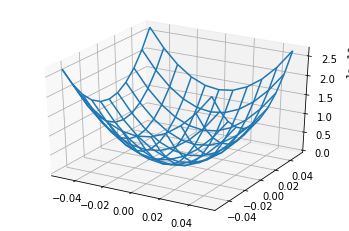

In [45]:
from numpy import linspace
from numpy import meshgrid
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rho = 7600; g = 9.81; nu = 0.3; E = 210E9; W = 0.1; B = 0.1; H = 100
ux = lambda x,y,z: -nu*rho*g*x*z/E
uy = lambda x,y,z: -nu*rho*g*y*z/E
uz = lambda x,y,z: rho*g*z**2/(2*E) + nu*rho*g*(x**2+y**2)/(2*E) - rho*g*H**2/(2*E)

x = linspace(-0.05,0.05,11)
y = linspace(-0.05,0.05,11)

X,Y = meshgrid(x,y)

UX = ux(X,Y,H)
UY = uy(X,Y,H)
UZ = uz(X,Y,H)

ax.plot_wireframe(X,Y,UZ)
plt.show()

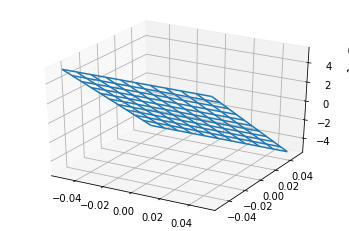

In [47]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(X,Y,UY)
plt.show()

Suppose to be zero displacement everywhere from problem statement. This is not satisfied - only at x=y=0 is the ux,uy,uz displacement zero - everywhere else is ux, uy and uz not zero. [5]